# Creating DataFrames and Using Sample Data Sets

This is the Jupyter Notebook **solution set* for the article, [Pandas Practice Questions – Fifty-Two Examples to Make You an Expert](https://codesolid.com/pandas-practice-questions-twenty-one-examples-to-make-you-an-expert/).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

**1.** Using NumPy, create a Pandas DataFrame with five rows and three columms:

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame

df = DataFrame(np.arange(15).reshape(5,3))
df

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11
4,12,13,14


**2.** For a Pandas DataFrame created from a NumPy array, what is the default behavior for the labels for the columns?  For the rows?

Both the "columns" value and the "index" value (for the rows) are set to zero based numeric arrays.

**3.** Create a second DataFrame as above with five rows and three columns, setting the row labels to the names of any five major US cities and the column labels to the first three months of the year.

In [3]:
df = DataFrame(np.arange(15).reshape(5,3))
df.index = ["NewYork", "LosAngeles", "Atlanta", "Boston", "SanFrancisco"]
df.columns = ["January", "February", "March"]
df

,January,February,March
NewYork,0,1,2
LosAngeles,3,4,5
Atlanta,6,7,8
Boston,9,10,11
SanFrancisco,12,13,14


**4.** You recall that the Seaborn package has some data sets built in, but can't remember how to list and load them. Assuming the functions to do so have "data" in the name, how might you locate them?  You can assume a Jupyter Notebook / IPython environment and explain the process, or write the code to do it in Python.

Method 1:  In an empty code cell, type sb + tab to bring up a list of names.  Type "data" to filter the names.

In [4]:
# Method 2:
[x for x in dir(sb) if "data" in x]

['get_data_home', 'get_dataset_names', 'load_dataset']

In [5]:
sb.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

# Loading data from CSV

**5**. Zillow home data is available at this URL: https://files.zillowstatic.com/research/public_csvs/zhvi/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv

Open this file as a DataFrame in Pandas.

In [6]:
df_homes = pd.read_csv("https://files.zillowstatic.com/research/public_csvs/zhvi/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")


**6.** Save the DataFrame, df_homes, to a local CSV file, "zillow_home_data.csv".  

In [7]:
df_homes.to_csv("../data/zillow_home_data.csv")

**7.** Load zillow_home_data.csv back into a new Dataframe, df_homes_2

In [8]:
df_homes_2 = pd.read_csv("../data/zillow_home_data.csv")

**8.** Compare the dimensions of the two DataFrames, df_homes and df_homes_2.  Are they equal?  If not, how can you fix it?

In [9]:
print(df_homes.shape)
print(df_homes_2.shape)
print(df_homes.shape == df_homes_2.shape)

(908, 271)
(908, 272)
False


To fix the fact that they're not equal, save file again this time using index=False to avoid saving the index as a CSV column.

In [10]:
df_homes.to_csv("../data/zillow_home_data.csv", index=False)
df_homes_2 = pd.read_csv("../data/zillow_home_data.csv")
print(df_homes.shape == df_homes_2.shape)

True


**9.** A remote spreadsheet showing how a snapshot of how traffic increased for a hypothetical website is available here: https://github.com/CodeSolid/CodeSolid.github.io/raw/main/booksource/data/AnalyticsSnapshot.xlsx. Load the worksheet page of the spreasheet data labelled "February 2022" as a DataFrame named "feb".  Note: the leftmost column in the spreadsheet is the index column.

In [11]:
url = "https://github.com/CodeSolid/CodeSolid.github.io/raw/main/booksource/data/AnalyticsSnapshot.xlsx"
feb = pd.read_excel(url, sheet_name="February 2022", index_col=0)
feb

,This Month,Last Month,Month to Month Increase
Users,1800.0,280.0,5.428571
New Users,1700.0,298.0,4.704698
Page Views,2534.0,436.0,4.811927


**10.** The "Month to Month Increase" column is a bit hard to understand, so ignore it for now.  Given the values for "This Month" and "Last Month", create a new column, "Percentage Increase".

In [12]:
feb["Percentage Increase"] = (feb["This Month"] - feb["Last Month"]) / feb["Last Month"] * 100
feb

,This Month,Last Month,Month to Month Increase,Percentage Increase
Users,1800.0,280.0,5.428571,542.857143
New Users,1700.0,298.0,4.704698,470.469799
Page Views,2534.0,436.0,4.811927,481.192661


# Basic Operations on Data

**11.** Using Seaborn, get a dataset about penguins into a dataframe named "df_penguins".  Note that because all of the following questions depend on this example, we'll provide the solution here so no one gets stuck:

In [13]:
df_penguins = sb.load_dataset('penguins')

**12.** Write the code to show the the number of rows and columns in df_penguins

In [14]:
df_penguins.shape

(344, 7)

**13.** How might you show the first few rows of df_penguins?

In [15]:
df_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


**14.** How can you return the unique species of penguins from df_penguins?  How many unique species are there?

In [16]:
species = df_penguins["species"].copy()
unique = species.fillna(0)
unique = unique.drop_duplicates()
nrows = unique.shape[0]
print(unique)
print(f"There are {nrows} unique species, {list(unique.values)}.")

0         Adelie
152    Chinstrap
220       Gentoo
Name: species, dtype: object
There are 3 unique species, ['Adelie', 'Chinstrap', 'Gentoo'].


**15.** What function can we use to drop the rows that have missing data?

In [17]:
df_penguins.dropna()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


**16.** By default, will this modify df_penguins or will it return a copy?

It will return a copy.

**17.** How can we override the default?

We can use ```df_penguins.dropna(inplace=True)```

**18.** Create a new DataFrame, df_penguins_full, with the missing data deleted.

In [18]:
df_penguins_full = df_penguins.dropna()

In [19]:
# Expoloratory only
df_penguins_full.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

**19.** What is the average bill length of a penguin, in millimeters, in this (df_full) data set?

In [20]:
df_penguins_full['bill_length_mm'].mean()

43.99279279279279

**20.** Which of the following is most strongly correlated with bill length?  a) Body mass?  b) Flipper length?  c) Bill depth?  Show how you arrived at the answer.

The answer is b) Flipper length.  See below:

In [21]:
print(df_penguins_full['bill_length_mm'].corr(df_penguins_full['body_mass_g']))
print(df_penguins_full['bill_length_mm'].corr(df_penguins_full['flipper_length_mm']))
print(df_penguins_full['bill_length_mm'].corr(df_penguins_full['bill_depth_mm']))


0.5894511101769488
0.6530956386670861
-0.2286256359130292


**21.** How could you show the median flipper length, grouped by species?

In [22]:
df_penguins_full.groupby('species').mean()['flipper_length_mm']

species
Adelie       190.102740
Chinstrap    195.823529
Gentoo       217.235294
Name: flipper_length_mm, dtype: float64

**22.** Which species has the longest flippers?

Gentoo

**23.** Which two species have the most similar mean weight?  Show how you arrived at the answer.

Adelie and Chinstrap

In [23]:
df_penguins_full.groupby('species').mean()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.823973,18.347260,190.102740,3706.164384
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.568067,14.996639,217.235294,5092.436975


**24.** How could you sort the rows by bill length?

In [24]:
df_penguins.sort_values('bill_length_mm')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
142,Adelie,Dream,32.1,15.5,188.0,3050.0,Female
98,Adelie,Dream,33.1,16.1,178.0,2900.0,Female
70,Adelie,Torgersen,33.5,19.0,190.0,3600.0,Female
92,Adelie,Dream,34.0,17.1,185.0,3400.0,Female
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
...,...,...,...,...,...,...,...
321,Gentoo,Biscoe,55.9,17.0,228.0,5600.0,Male
169,Chinstrap,Dream,58.0,17.8,181.0,3700.0,Female
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN


**25.** How could you run the same sort in descending order?

In [25]:
df_penguins.sort_values(['bill_length_mm'], ascending=False)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male
169,Chinstrap,Dream,58.0,17.8,181.0,3700.0,Female
321,Gentoo,Biscoe,55.9,17.0,228.0,5600.0,Male
215,Chinstrap,Dream,55.8,19.8,207.0,4000.0,Male
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,Male
...,...,...,...,...,...,...,...
70,Adelie,Torgersen,33.5,19.0,190.0,3600.0,Female
98,Adelie,Dream,33.1,16.1,178.0,2900.0,Female
142,Adelie,Dream,32.1,15.5,188.0,3050.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN


**26.** How could you sort by species first, then by body mass?

In [26]:
df_penguins.sort_values(['species', 'body_mass_g'])

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
58,Adelie,Biscoe,36.5,16.6,181.0,2850.0,Female
64,Adelie,Biscoe,36.4,17.1,184.0,2850.0,Female
54,Adelie,Biscoe,34.5,18.1,187.0,2900.0,Female
98,Adelie,Dream,33.1,16.1,178.0,2900.0,Female
116,Adelie,Torgersen,38.6,17.0,188.0,2900.0,Female
...,...,...,...,...,...,...,...
297,Gentoo,Biscoe,51.1,16.3,220.0,6000.0,Male
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,Male
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male
237,Gentoo,Biscoe,49.2,15.2,221.0,6300.0,Male


# Selecting Rows, Columns, and Cells

Let's look at some precious stones now, and leave the poor penguins alone for a while.  Let's look at some precious stones now, and leave the poor penguins alone for a while.  

**27.** Load the Seaborn "diamonds" dataset into a Pandas dataframe named diamonds.

In [27]:
diamonds = sb.load_dataset('diamonds')

**28.** Display the columns that are available.

In [28]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

**29.** If you select a single column from the diamonds DataFrame, what will be the type of the return value?

A Pandas Series.

**30.** Select the 'table' column and show its type

In [29]:
table = diamonds['table']
type(table)

pandas.core.series.Series

**31.** Select the first ten rows of the price and carat columns ten rows of the diamonds DataFrame into a variable called subset, and display them.

In [30]:
subset = diamonds.loc[0:9, ['price', 'carat']]
subset

,price,carat
0,326,0.23
1,326,0.21
2,327,0.23
3,334,0.29
4,335,0.31
5,336,0.24
6,336,0.24
7,337,0.26
8,337,0.22
9,338,0.23


**32.** For a given column, show the code to display the datatype of the _values_ in the column?  

In [31]:
diamonds['price'].dtype

dtype('int64')

**33.** Select the first row of the diamonds DataFrame into a variable called row.

In [32]:
row = diamonds.iloc[0,:]

**34.** What would you expect the data type of the row to be?  Display it.

A Pandas series

In [33]:
type(row)

pandas.core.series.Series

**35.** Can you discover the names of the columns using only the row returned in #33?  Why or why not?Can you discover the names of the columns using only the row returned in #33?  Why or why not?

Yes, because a row series should have the columns as the index (See below):

In [34]:
row.index

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

**36.** Select the row with the highest priced diamond.

In [35]:
diamonds.loc[diamonds['price'].idxmax(), :]

carat         2.29
cut        Premium
color            I
clarity        VS2
depth         60.8
table         60.0
price        18823
x              8.5
y             8.47
z             5.16
Name: 27749, dtype: object

**37.** Select the row with the lowest priced diamond.

In [36]:
diamonds.loc[diamonds['price'].idxmin(), :]

carat       0.23
cut        Ideal
color          E
clarity      SI2
depth       61.5
table       55.0
price        326
x           3.95
y           3.98
z           2.43
Name: 0, dtype: object

# Some Exercises Using Time Series

**38.** Load the taxis dataset into a DataFrame, ```taxis```.

In [37]:
taxis = sb.load_dataset('taxis')

**39.** The 'pickup' column contains the date and time the customer picked up, but it's a string.  Add a column to the DataFrame, 'pickup_time', containing the value in 'pickup' as a DateTime.

In [38]:
taxis['pickup_time'] = pd.to_datetime(taxis['pickup'])

**40.** We have a hypothesis that as the day goes on, the tips get higher.  We'll need to wrangle the data a bit before testing this, however.  First, now that we have a datetime column, pickup_time, create a subset of it to create a new DataFrame, taxis_one_day. This new DataFrame should have values between '2019-03-23 00:06:00' (inclusive) and '2019-03-24 00:00:00' (exlusive).

In [39]:
mask = (taxis['pickup_time'] >= '2019-03-23 06:00:00') & (taxis['pickup_time'] < '2019-03-24 00:00:00')
taxis_one_day = taxis.loc[mask]

**41.** We now have a range from morning until midnight, but we to take the mean of the numeric columns, grouped at one hour intervals.  Save the result as df_means, and display it.

In [40]:
taxis_means = taxis_one_day.groupby(pd.Grouper(key='pickup_time', freq='1h')).mean()
taxis_means

,passengers,distance,fare,tip,tolls,total
pickup_time,,,,,,
2019-03-23 06:00:00,1.000000,0.400000,21.500000,0.000000,0.000000,23.133333
2019-03-23 07:00:00,2.333333,0.980000,5.250000,1.165000,0.000000,9.298333
2019-03-23 08:00:00,1.000000,0.020000,2.500000,0.000000,0.000000,3.300000
2019-03-23 09:00:00,1.500000,1.352000,7.400000,1.674000,0.000000,12.124000
2019-03-23 10:00:00,1.000000,1.760000,8.750000,0.727500,0.000000,12.152500
2019-03-23 11:00:00,1.909091,2.070000,11.090909,0.803636,0.000000,14.667273
2019-03-23 12:00:00,2.000000,2.267143,10.260000,0.645714,0.000000,13.420000
2019-03-23 13:00:00,2.500000,1.167000,7.550000,2.074000,0.000000,12.344000
2019-03-23 14:00:00,2.470588,4.752941,18.330000,1.945294,1.003529,24.267059


**42.** Create a simple line plot of the value "distance".  

<AxesSubplot:xlabel='pickup_time'>

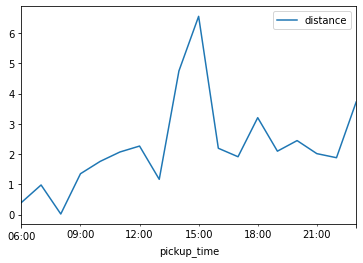

In [41]:
taxis_means.plot(y='distance')

**43.** Overall, do riders travel further or less far as the day progresses?

They travel further.

**44.** Create a new column in taxis_means, ```tip_in_percent```.  The source columns for this should be "fare" and "tip"

In [42]:
taxis_means['tip_in_percent'] = taxis_means.tip / taxis_means.fare * 100
taxis_means.tip_in_percent

pickup_time
2019-03-23 06:00:00     0.000000
2019-03-23 07:00:00    22.190476
2019-03-23 08:00:00     0.000000
2019-03-23 09:00:00    22.621622
2019-03-23 10:00:00     8.314286
2019-03-23 11:00:00     7.245902
2019-03-23 12:00:00     6.293512
2019-03-23 13:00:00    27.470199
2019-03-23 14:00:00    10.612625
2019-03-23 15:00:00    14.450161
2019-03-23 16:00:00    10.608696
2019-03-23 17:00:00    18.141104
2019-03-23 18:00:00     6.584958
2019-03-23 19:00:00    11.461538
2019-03-23 20:00:00    13.909910
2019-03-23 21:00:00    13.432432
2019-03-23 22:00:00    12.267241
2019-03-23 23:00:00    11.221374
Freq: H, Name: tip_in_percent, dtype: float64

**45.** Create a new column, time_interval, as a range of integer values beginning with zero.

In [43]:
taxis_means['time_interval'] = np.arange(0, taxis_means.shape[0])
taxis_means.time_interval

pickup_time
2019-03-23 06:00:00     0
2019-03-23 07:00:00     1
2019-03-23 08:00:00     2
2019-03-23 09:00:00     3
2019-03-23 10:00:00     4
2019-03-23 11:00:00     5
2019-03-23 12:00:00     6
2019-03-23 13:00:00     7
2019-03-23 14:00:00     8
2019-03-23 15:00:00     9
2019-03-23 16:00:00    10
2019-03-23 17:00:00    11
2019-03-23 18:00:00    12
2019-03-23 19:00:00    13
2019-03-23 20:00:00    14
2019-03-23 21:00:00    15
2019-03-23 22:00:00    16
2019-03-23 23:00:00    17
Freq: H, Name: time_interval, dtype: int64

Display the correlations between the following pairs of values:
1. tip_in_percent and distance.
1. tip_in_percent and passengers.
1. tip_in_percent and time_interval.

In [44]:
print(taxis_means['tip_in_percent'].corr(taxis_means['distance']))
print(taxis_means['tip_in_percent'].corr(taxis_means['passengers']))
print(taxis_means['tip_in_percent'].corr(taxis_means['time_interval']))

0.058068558052138404
0.39614201273484234
0.11904714170082598


**47.** Admittedly, the size of the data set is fairly small given how we've subsetted it.  But based on the values in #45, which of the three pairs show the strongest correlation.

tip_in_percent and passengers.

**48.** Did our hypothesis that people tip more as the day goes on turn out to be warranted?

Not based on this dataset, no.